In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Data Inspection and Cleaning

In [2]:
df = pd.read_csv('../data/FinalDataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3873 entries, 0 to 3872
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   lganame                    3873 non-null   object 
 1   statename                  3873 non-null   object 
 2   num_health_facilities      3873 non-null   int64  
 3   longitude                  3873 non-null   float64
 4   population                 3873 non-null   float64
 5   lgaarea                    3873 non-null   float64
 6   popdensity                 3873 non-null   float64
 7   Facilities_per_10k_people  3873 non-null   float64
 8   water_per_lga              3873 non-null   int64  
 9   NEAR_DIST_Health           3873 non-null   float64
 10  NEAR_DIST_Water            3873 non-null   float64
 11  Case                       3873 non-null   float64
 12  Year                       3873 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage:

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
num_health_facilities,3873.0,65.958430,38.223679,5.000000,38.000000,58.000000,82.000000,3.160000e+02
longitude,3873.0,7.362229,2.452842,2.724116,5.511710,7.324913,8.569092,1.446598e+01
population,3873.0,307867.145533,270811.798830,21318.444280,153168.291500,251333.799500,371072.568100,3.234546e+06
lgaarea,3873.0,1178.694383,1394.763526,5.048226,285.367432,708.769836,1526.717651,1.075228e+04
popdensity,3873.0,1220.077217,2885.480146,12.903886,142.124023,347.382477,756.739136,3.259696e+04
Facilities_per_10k_people,3873.0,2.752178,1.635136,0.126190,1.597958,2.412879,3.398715,1.280089e+01
water_per_lga,3873.0,18.786212,48.031054,0.000000,0.000000,3.000000,13.000000,4.890000e+02
NEAR_DIST_Health,3873.0,2520.685276,2489.580239,48.902318,905.050590,1780.452247,3167.696492,1.683548e+04
NEAR_DIST_Water,3873.0,6702.844656,7269.544083,7.445095,1570.985792,4590.375057,9430.513157,5.114681e+04
Case,3873.0,15.066873,208.546066,0.000000,0.000000,0.000000,0.000000,9.336000e+03


## Target Variable Inspection

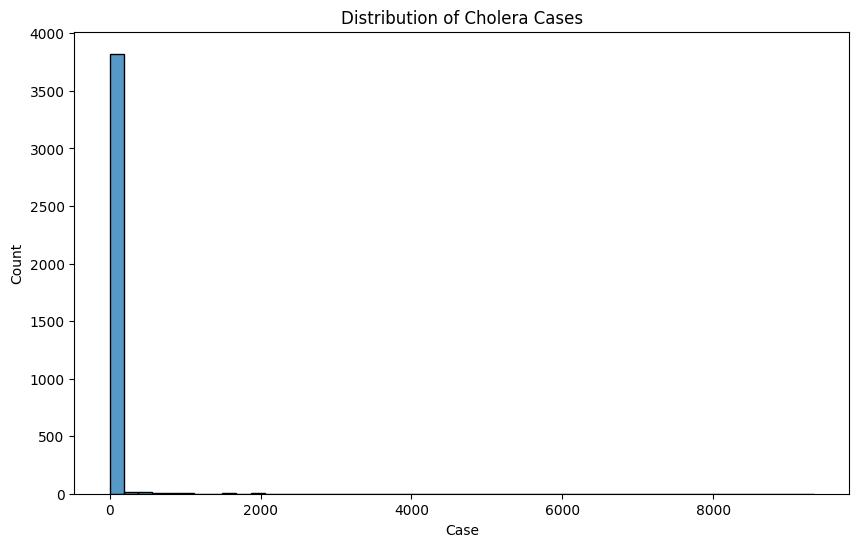

In [5]:
# 1. Histogram of Cases
plt.figure(figsize=(10, 6))
sns.histplot(df['Case'], bins=50, kde=False)
plt.title("Distribution of Cholera Cases")
plt.show()


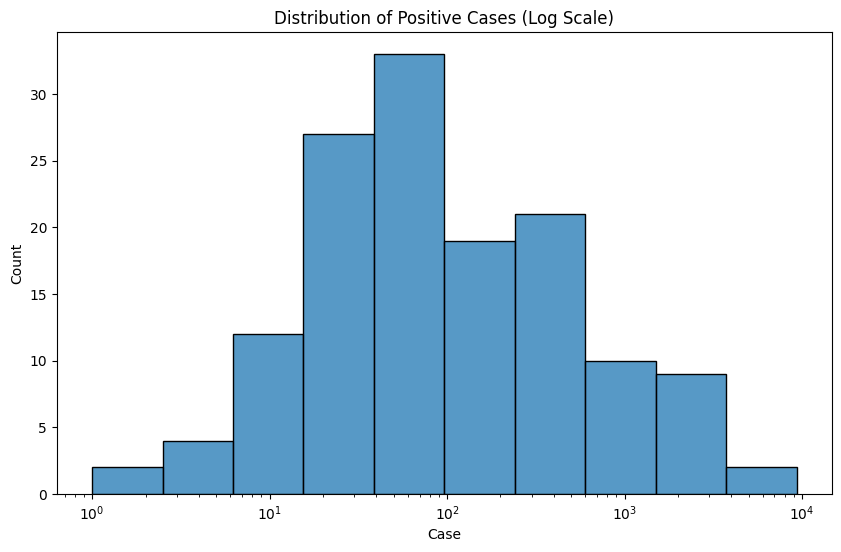

In [6]:
# 2. The "Severity" Plot (Log Scale)
# Since 0 dominates, let's look at ONLY the positive cases
positive_df = df[df['Case'] > 0]
plt.figure(figsize=(10, 6))
sns.histplot(positive_df['Case'], log_scale=True)
plt.title("Distribution of Positive Cases (Log Scale)")
plt.show()

## Feature vs Target Analysis

In [7]:
df['Has_Outbreak'] = np.where(df['Case'] > 0, 1, 0)

In [8]:
df.columns

Index(['lganame', 'statename', 'num_health_facilities', 'longitude',
       'population', 'lgaarea', 'popdensity', 'Facilities_per_10k_people',
       'water_per_lga', 'NEAR_DIST_Health', 'NEAR_DIST_Water', 'Case', 'Year',
       'Has_Outbreak'],
      dtype='object')

In [9]:
df['log_popdensity'] = np.log1p(df['popdensity'])


df['water_density'] = df['water_per_lga'] * df['log_popdensity']
df['water_density'] = np.log1p(df['water_density'])

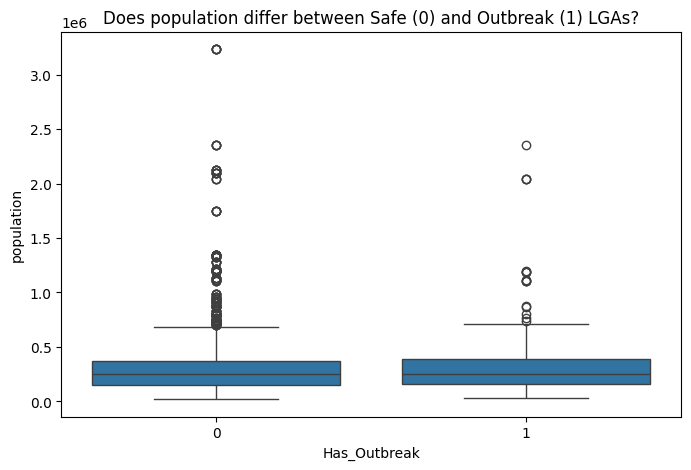

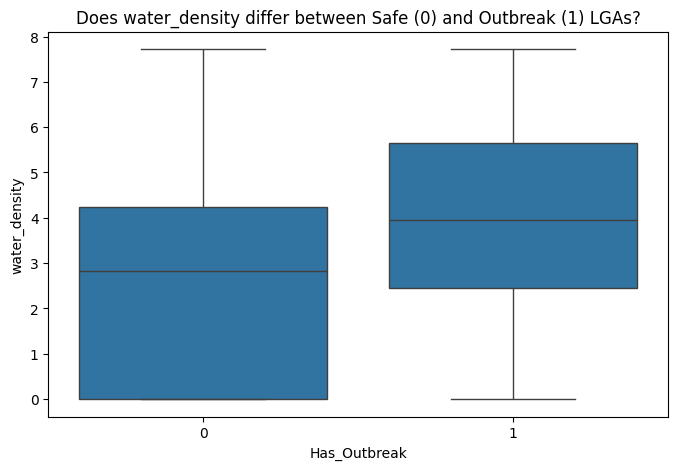

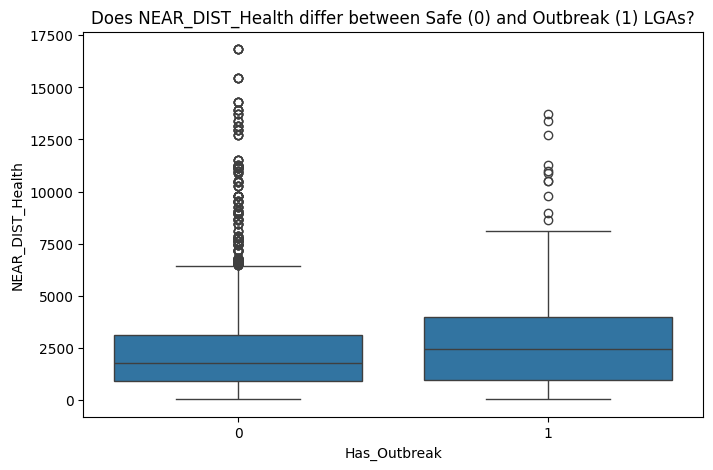

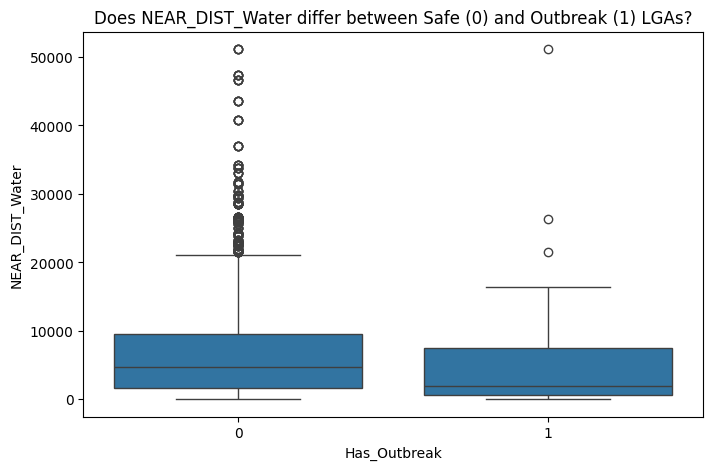

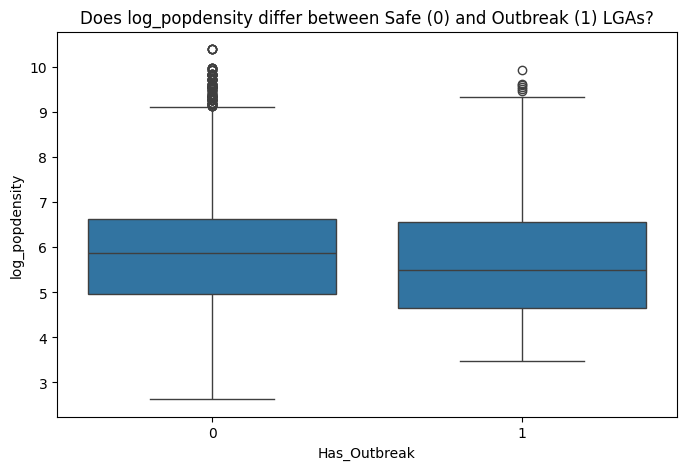

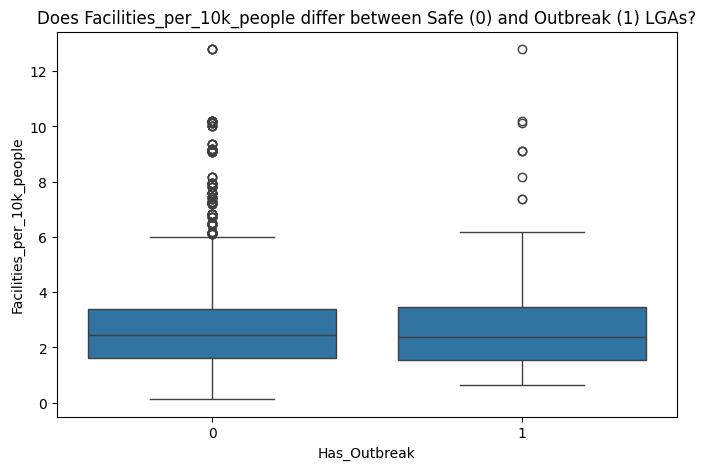

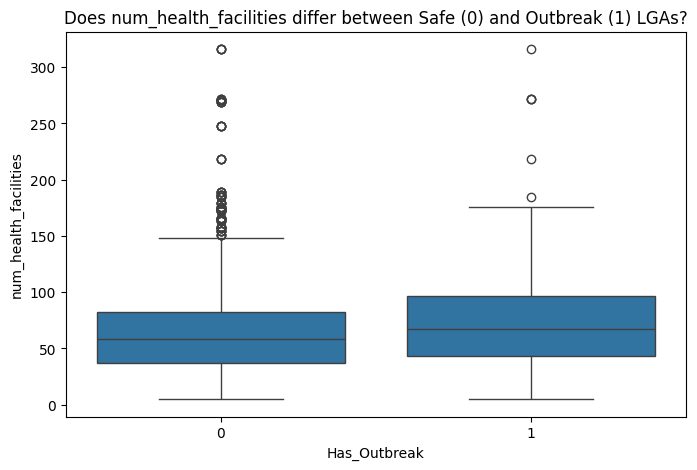

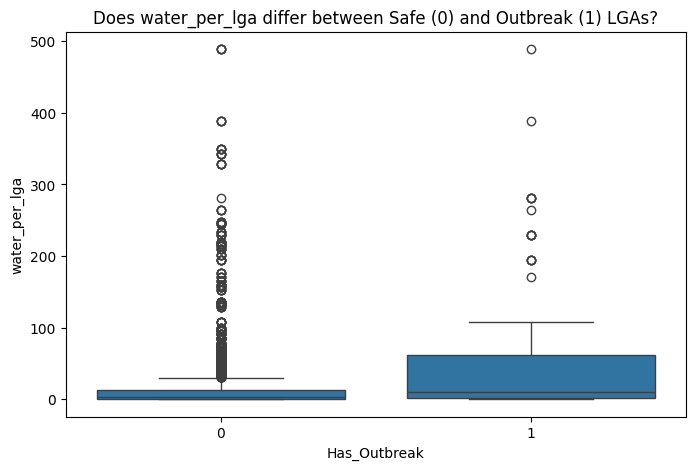

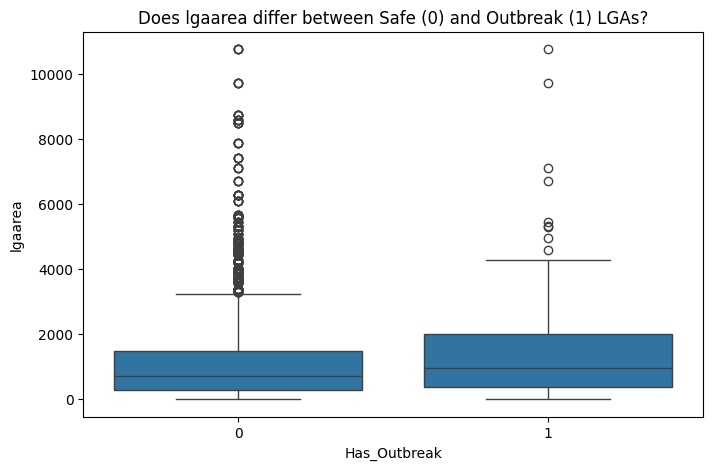

In [10]:
# Boxplots: Compare Features for Outbreak vs. Non-Outbreak LGAs
features_to_check = ['population','water_density','NEAR_DIST_Health','NEAR_DIST_Water', 'log_popdensity', 'Facilities_per_10k_people', 'num_health_facilities', 'water_per_lga', 'lgaarea']

for feature in features_to_check:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Has_Outbreak', y=feature, data=df)
    plt.title(f"Does {feature} differ between Safe (0) and Outbreak (1) LGAs?")
    plt.show()

In [13]:
pd.set_option('display.max_rows', None)

In [18]:
cases_by_state = df.groupby('statename')['Case'].sum().sort_values(ascending=False).reset_index()
cases_by_state.rename(columns={'Case': 'Total_Cases'}, inplace=True)
cases_by_state.to_csv('../data/cases_by_state.csv', index=False)

In [11]:
num_columns = df.select_dtypes(include=['float64', 'int64']).columns
num_df = df[num_columns]

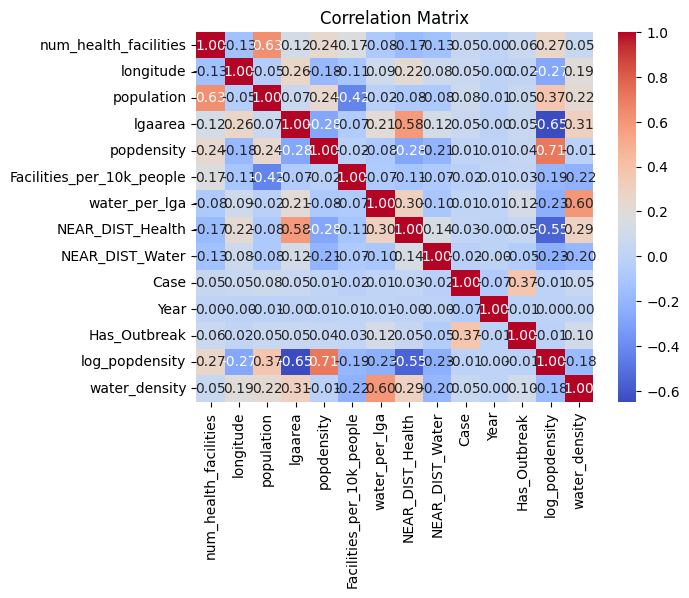

In [16]:
sns.heatmap(num_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()